In [48]:
import pandas as pd

# Load the datasets into pandas DataFrames
recipes_df = pd.read_csv('data/RAW_recipes.csv')
interactions_df = pd.read_csv('data/RAW_interactions.csv')


In [49]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [50]:
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


#### RAW_recipes
###### - id : Identifiant unique de la recette.
###### - name : Nom de la recette.
###### - minutes : Temps total de préparation de la recette, en minutes.
###### - contributor_id : Identifiant de l'utilisateur qui a contribué à la recette.
###### - submitted : Date de soumission de la recette.
###### - tags : Liste de tags associés à la recette (par exemple, "végétarien", "facile").
###### - nutrition : Informations nutritionnelles de la recette, formatées sous forme de liste (calories, graisses, sucres, etc.).
###### - n_steps : Nombre d'étapes nécessaires pour réaliser la recette.
###### - steps : Liste des étapes de préparation, décrivant le processus de cuisson.
###### - description : Brève description ou introduction à la recette.
###### - ingredients : Liste des ingrédients nécessaires.
###### - n_ingredients : Nombre total d'ingrédients requis pour la recette.
#### RAW_interactions
###### - user_id : Identifiant unique de l'utilisateur qui a interagi avec une recette.
###### - recipe_id : Identifiant unique de la recette avec laquelle l'utilisateur a interagi.
###### - date : Date de l'interaction.
###### - rating : Note attribuée par l'utilisateur à la recette (en général, sur une échelle de 1 à 5).
###### - review : Commentaire de l'utilisateur sur la recette.

####  Q1:Quelles sont les caractéristiques des recettes les plus populaires ?

#### Q2:Quels sont les facteurs influençant les notes des recettes, en prenant en compte le temps de préparation, le nombre d'étapes, et les ingrédients utilisés ?

Pour répondre à ces deux questions, il sera effectivement nécessaire d'utiliser à la fois les datasets RAW_recipes et RAW_interactions:

RAW_recipes : Ce dataset contient les caractéristiques des recettes, telles que le temps de préparation (minutes), le nombre d'étapes (n_steps), et les ingrédients (ingredients, n_ingredients). Ces informations sont essentielles pour analyser les attributs des recettes.

RAW_interactions : Ce dataset fournit les notes des utilisateurs (rating), qui sont nécessaires pour évaluer la popularité des recettes et analyser les facteurs influençant les notes. Il permet également de déterminer quelles recettes sont les plus populaires en fonction du nombre de notes et de la moyenne des évaluations.

In [51]:
# 2. Vérifier les types de données
print("\nTypes de données pour RAW recipes:")
print(recipes_df.dtypes)
print("\nTypes de données pour RAW interactions:")
print(interactions_df.dtypes)


Types de données pour RAW recipes:
name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Types de données pour RAW interactions:
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object


In [52]:
# 3. Obtenir des informations statistiques descriptives
print("\nStatistiques descriptives pour RAW_recipes:")
print(recipes_df.describe())  # Inclut toutes les colonnes pour les statistiques



Statistiques descriptives pour RAW_recipes:
                  id       minutes  contributor_id        n_steps  \
count  231637.000000  2.316370e+05    2.316370e+05  231637.000000   
mean   222014.708984  9.398546e+03    5.534885e+06       9.765499   
std    141206.635626  4.461963e+06    9.979141e+07       5.995128   
min        38.000000  0.000000e+00    2.700000e+01       0.000000   
25%     99944.000000  2.000000e+01    5.690500e+04       6.000000   
50%    207249.000000  4.000000e+01    1.736140e+05       9.000000   
75%    333816.000000  6.500000e+01    3.982750e+05      12.000000   
max    537716.000000  2.147484e+09    2.002290e+09     145.000000   

       n_ingredients  
count  231637.000000  
mean        9.051153  
std         3.734796  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  


In [53]:
print("\nStatistiques descriptives pour RAW_interactions:")
print(interactions_df.describe(include='all'))


Statistiques descriptives pour RAW_interactions:
             user_id     recipe_id        date        rating      review
count   1.132367e+06  1.132367e+06     1132367  1.132367e+06     1132198
unique           NaN           NaN        6396           NaN     1125282
top              NaN           NaN  2008-01-27           NaN  Delicious!
freq             NaN           NaN         723           NaN         309
mean    1.384291e+08  1.608972e+05         NaN  4.411016e+00         NaN
std     5.014269e+08  1.303987e+05         NaN  1.264752e+00         NaN
min     1.533000e+03  3.800000e+01         NaN  0.000000e+00         NaN
25%     1.354700e+05  5.425700e+04         NaN  4.000000e+00         NaN
50%     3.309370e+05  1.205470e+05         NaN  5.000000e+00         NaN
75%     8.045500e+05  2.438520e+05         NaN  5.000000e+00         NaN
max     2.002373e+09  5.377160e+05         NaN  5.000000e+00         NaN


In [54]:
# 4. Vérifier les valeurs manquantes
print("\nValeurs manquantes dans RAW recipes:")
print(recipes_df.isnull().sum())

print("\nValeurs manquantes dans RAW interactions:")
print(interactions_df.isnull().sum())


Valeurs manquantes dans RAW recipes:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Valeurs manquantes dans RAW interactions:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [55]:
# 5. Identifier les doublons
print("\nDoublons dans RAW_recipes:")
print(recipes_df.duplicated().sum())  # Affiche le nombre de doublons

print("\nDoublons dans RAW_interactions:")
print(interactions_df.duplicated().sum())  # Affiche le nombre de doublons


Doublons dans RAW_recipes:
0

Doublons dans RAW_interactions:
0


In [56]:
# 6. Analyse des catégories et des types de données non numériques
if 'tags' in recipes_df.columns:
    print("\nValeurs uniques dans les tags:")
    print(recipes_df['tags'].value_counts())  # Fréquence des tags


Valeurs uniques dans les tags:
tags
['15-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-1-or-2', '5-ingredients-or-less', 'beverages', 'easy', 'cocktails', 'number-of-servings', '3-steps-or-less']                                                                                                                                       397
['60-minutes-or-less', 'time-to-make', 'preparation']                                                                                                                                                                                                                                                                   324
['time-to-make', 'preparation', '4-hours-or-less']                                                                                                                                                                                                                                                                      237
['30-minutes-or

In [57]:
if 'ingredients' in recipes_df.columns:
    print("\nValeurs uniques dans les ingrédients:")
    # Pour afficher les ingrédients, vous pouvez éventuellement convertir la colonne en liste
    # Ici, nous considérons que la colonne 'ingredients' contient des listes sous forme de chaînes de caractères
    all_ingredients = recipes_df['ingredients'].str.cat(sep=',').split(',')  # Concatène et divise par les virgules
    ingredient_counts = pd.Series(all_ingredients).value_counts()
    print(ingredient_counts)


Valeurs uniques dans les ingrédients:
 'salt'                                         78127
 'butter'                                       38862
 'sugar'                                        38756
 'onion'                                        35739
 'eggs'                                         28726
                                                ...  
['lean pot roast beef'                              1
['sumac'                                            1
 'jell-o chocolate pudding and pie filling']        1
 'mochiko sweet rice flour']                        1
 'chocolate cupcake'                                1
Name: count, Length: 29580, dtype: int64


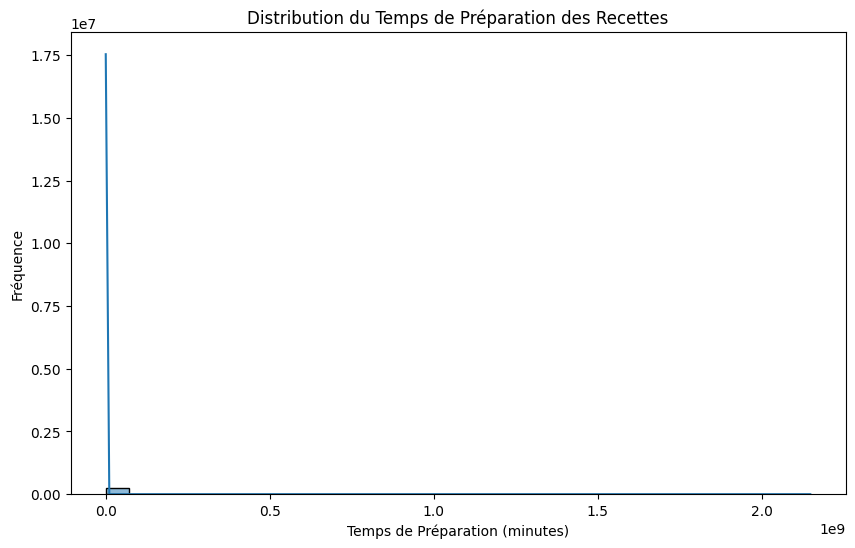

In [58]:
# 7. Visualisation préliminaire
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme pour le temps de préparation dans RAW_recipes
plt.figure(figsize=(10, 6))
sns.histplot(recipes_df['minutes'], bins=30, kde=True)
plt.title('Distribution du Temps de Préparation des Recettes')
plt.xlabel('Temps de Préparation (minutes)')
plt.ylabel('Fréquence')
plt.show()

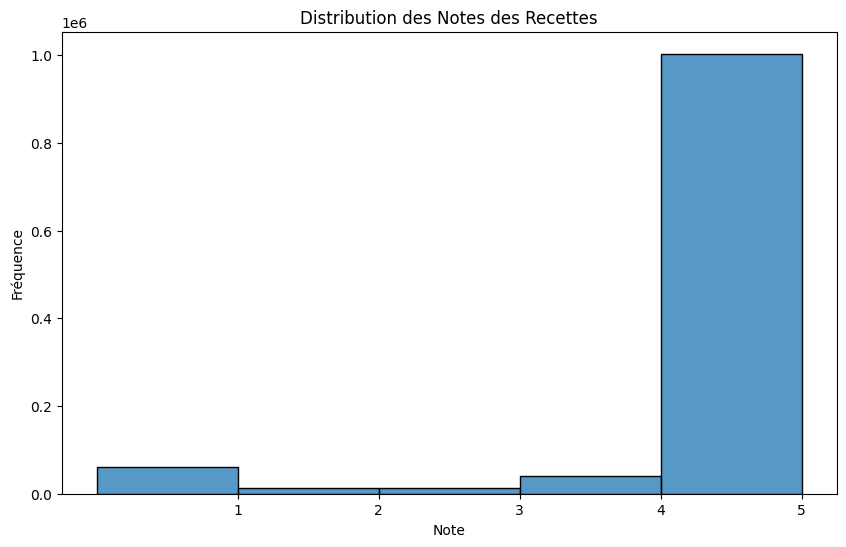

In [59]:
# Histogramme pour les notes dans RAW_interactions
plt.figure(figsize=(10, 6))
sns.histplot(interactions_df['rating'].dropna(), bins=5, kde=False)
plt.title('Distribution des Notes des Recettes')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.xticks(range(1, 6))
plt.show()

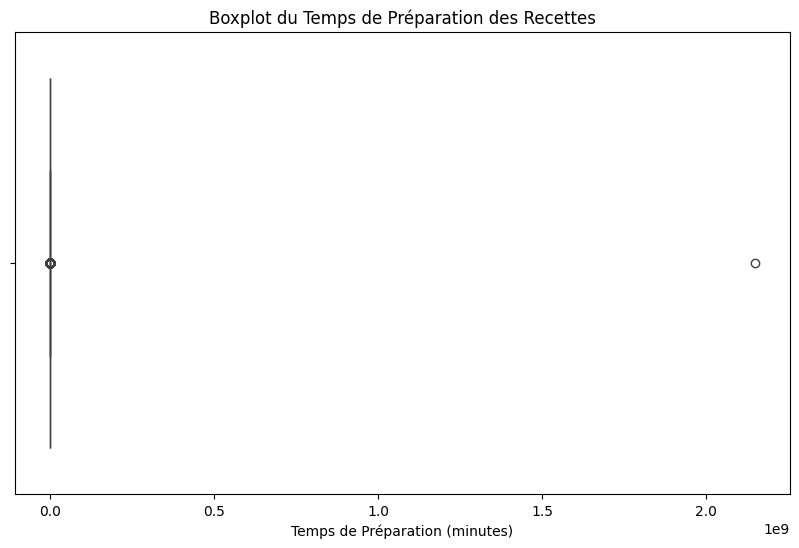

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df['minutes'])
plt.title('Boxplot du Temps de Préparation des Recettes')
plt.xlabel('Temps de Préparation (minutes)')
plt.show()

In [61]:
# Calculer Q1 et Q3
Q1 = recipes_df['minutes'].quantile(0.25)
Q3 = recipes_df['minutes'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher les valeurs aberrantes détectées
outliers = recipes_df[(recipes_df['minutes'] < lower_bound) | (recipes_df['minutes'] > upper_bound)]
print("Valeurs aberrantes détectées :")
print(outliers)

# Supprimer les valeurs aberrantes
recipes_df_cleaned = recipes_df[(recipes_df['minutes'] >= lower_bound) & (recipes_df['minutes'] <= upper_bound)]

# Afficher la taille originale et la taille après nettoyage
print(f"Taille originale du dataset : {len(recipes_df)}")
print(f"Taille après suppression des valeurs aberrantes : {len(recipes_df_cleaned)}")

Valeurs aberrantes détectées :
                                                 name      id  minutes  \
4                  amish  tomato ketchup  for canning   44061      190   
8                            bananas 4 ice cream  pie   70971      180   
11                      better than sex  strawberries   42198     1460   
12                    better then bush s  baked beans   67547     2970   
13                         boat house  collard greens  107517      525   
...                                               ...     ...      ...   
231603                        zupse bread swiss bread  115337      290   
231614  zuurkool met spek   sauerkraut and pork hocks  238017      195   
231617           zwetschgenkuchen  bavarian plum cake  386977      240   
231622                    zwiebelbrotchen onion rolls  424875      210   
231627                   zwiebelwhe  swiss onion tart  410985      165   

        contributor_id   submitted  \
4                41706  2002-10-25   
8   

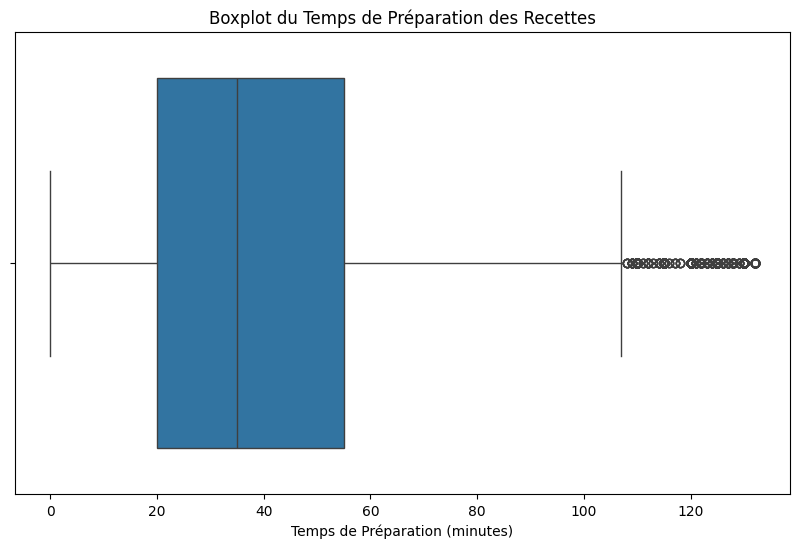

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned['minutes'])
plt.title('Boxplot du Temps de Préparation des Recettes')
plt.xlabel('Temps de Préparation (minutes)')
plt.show()

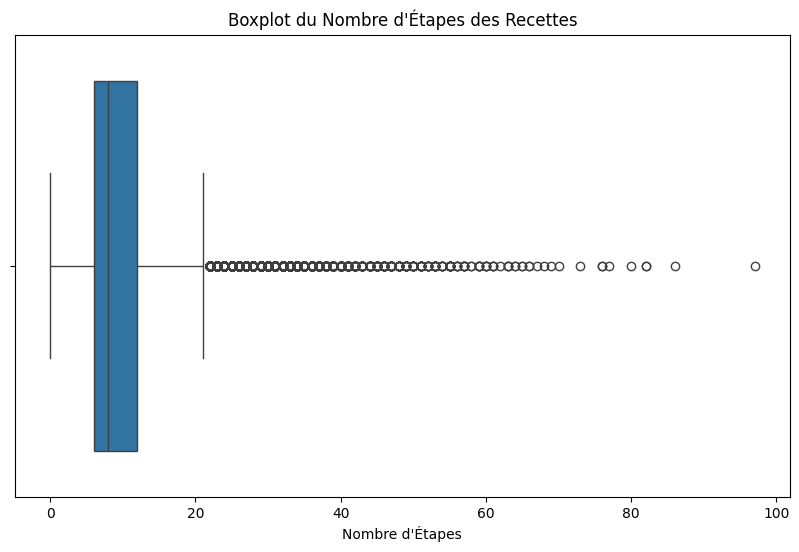

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned['n_steps'])
plt.title('Boxplot du Nombre d\'Étapes des Recettes')
plt.xlabel('Nombre d\'Étapes')
plt.show()

In [64]:
Q1_steps = recipes_df_cleaned['n_steps'].quantile(0.25)
Q3_steps = recipes_df_cleaned['n_steps'].quantile(0.75)
IQR_steps = Q3_steps - Q1_steps

lower_bound_steps = Q1_steps - 1.5 * IQR_steps
upper_bound_steps = Q3_steps + 1.5 * IQR_steps
# Afficher la taille originale et la taille après nettoyage
print(f"Taille originale du dataset : {len(recipes_df_cleaned)}")

# Supprimer les valeurs aberrantes dans 'n_steps'
recipes_df_cleaned = recipes_df_cleaned[(recipes_df_cleaned['n_steps'] >= lower_bound_steps) & (recipes_df_cleaned['n_steps'] <= upper_bound_steps)]
print(f"Taille après suppression des valeurs aberrantes : {len(recipes_df_cleaned)}")

Taille originale du dataset : 207923
Taille après suppression des valeurs aberrantes : 200291


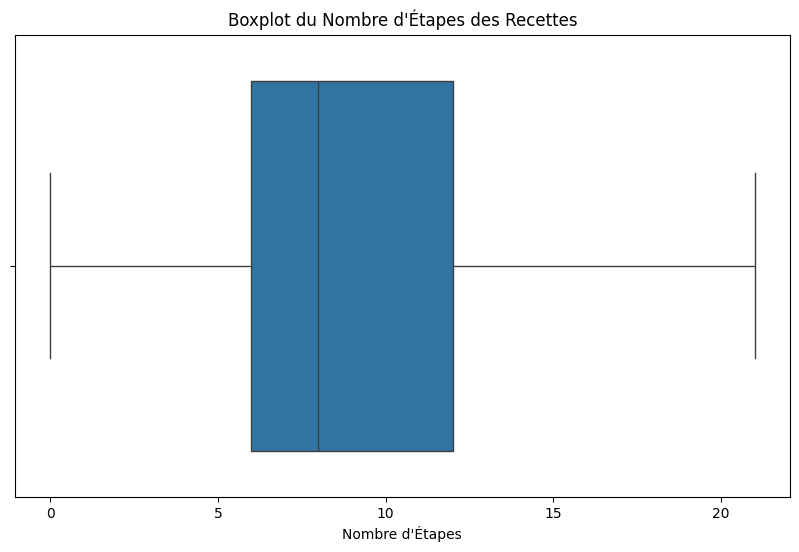

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned['n_steps'])
plt.title('Boxplot du Nombre d\'Étapes des Recettes')
plt.xlabel('Nombre d\'Étapes')
plt.show()

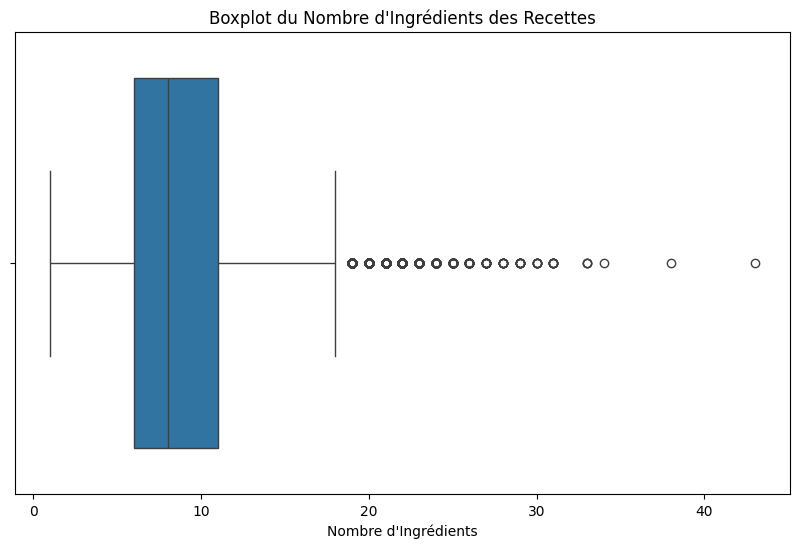

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned['n_ingredients'])
plt.title('Boxplot du Nombre d\'Ingrédients des Recettes')  
plt.xlabel('Nombre d\'Ingrédients')  
plt.show()

In [67]:
Q1_steps = recipes_df_cleaned['n_ingredients'].quantile(0.25)
Q3_steps = recipes_df_cleaned['n_ingredients'].quantile(0.75)
IQR_steps = Q3_steps - Q1_steps

lower_bound_steps = Q1_steps - 1.5 * IQR_steps
upper_bound_steps = Q3_steps + 1.5 * IQR_steps
# Afficher la taille originale et la taille après nettoyage
print(f"Taille originale du dataset : {len(recipes_df_cleaned)}")

# Supprimer les valeurs aberrantes dans 'n_steps'
recipes_df_cleaned = recipes_df_cleaned[(recipes_df_cleaned['n_ingredients'] >= lower_bound_steps) & (recipes_df_cleaned['n_ingredients'] <= upper_bound_steps)]
print(f"Taille après suppression des valeurs aberrantes : {len(recipes_df_cleaned)}")

Taille originale du dataset : 200291
Taille après suppression des valeurs aberrantes : 198177


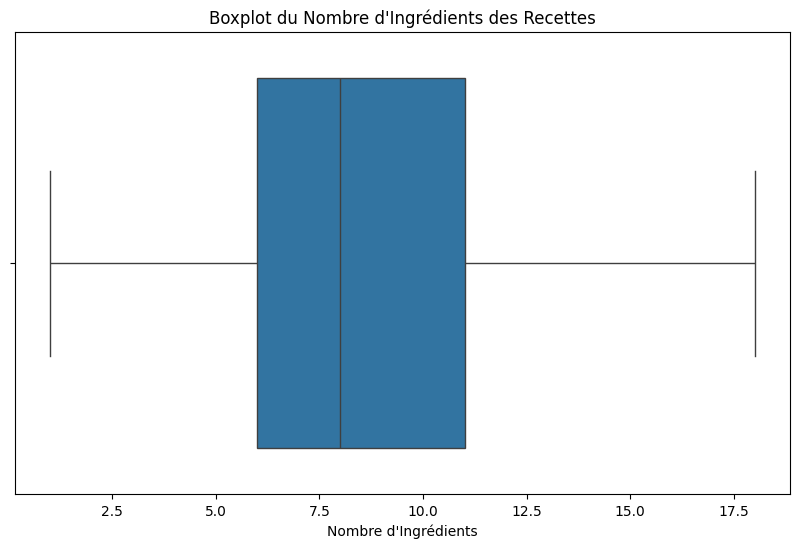

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=recipes_df_cleaned['n_ingredients'])  
plt.title('Boxplot du Nombre d\'Ingrédients des Recettes')  
plt.xlabel('Nombre d\'Ingrédients')  
plt.show()


In [69]:
# Adjusting the merge to account for different column names
merged_data = pd.merge(recipes_df_cleaned, interactions_df, left_on='id', right_on='recipe_id')

# Now, you can proceed with the merged DataFrame
print(merged_data.head())

                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1  arriba   baked winter squash mexican style  137739       55   
2  arriba   baked winter squash mexican style  137739       55   
3            a bit different  breakfast pizza   31490       30   
4            a bit different  breakfast pizza   31490       30   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           47892  2005-09-16   
2           47892  2005-09-16   
3           26278  2002-06-17   
4           26278  2002-06-17   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['60-minutes-or-less', 'time-to-make', 'course...   
2  ['60-minutes-or-less', 'time-to-make', 'course...   
3  ['30-minutes-or-less', 'time-to-make', 'course...   
4  ['30-minutes-or-less', 'time-to-make', 'course...   

                                   nutrition  n_steps  \
0      [51

In [70]:
##drop the redundant 'recipe_id' column from the merged DataFrame
merged_data = merged_data.drop(columns=['recipe_id'])

In [71]:
# Calcul de la note moyenne pour chaque recette
recipe_ratings = merged_data.groupby('id')['rating'].mean().reset_index()
recipe_ratings.columns = ['id', 'average_rating']

# Ajouter la note moyenne au dataset nettoyé
final_data = pd.merge(recipes_df_cleaned, recipe_ratings, on='id')

In [72]:
# Calculer le nombre d'interactions par recette
interaction_counts = merged_data.groupby('id')['rating'].count().reset_index()
interaction_counts.columns = ['id', 'num_interactions']

# Ajouter le nombre d'interactions au dataset final
final_data = pd.merge(final_data, interaction_counts, on='id')

In [73]:
final_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,average_rating,num_interactions
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5,2
4,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,5.0,2


In [74]:
# créer des catégories pour le temps de préparation
final_data['prep_time_category'] = pd.cut(final_data['minutes'], bins=[0, 30, 60, 120, float('inf')], labels=['<30 min', '30-60 min', '1-2 hrs', '>2 hrs'])


In [75]:
final_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,average_rating,num_interactions,prep_time_category
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3,30-60 min
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4,<30 min
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1,>2 hrs
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5,2,30-60 min
4,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,5.0,2,NaN


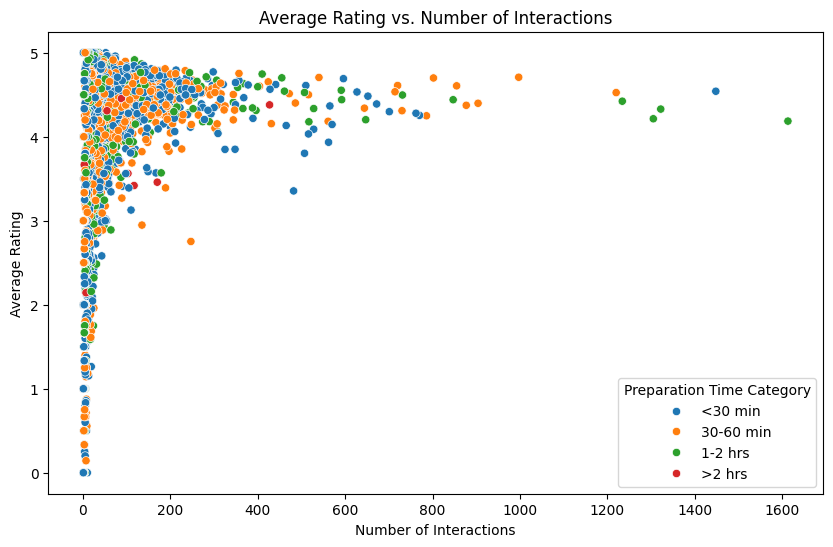

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='num_interactions', y='average_rating', hue='prep_time_category')
plt.title('Average Rating vs. Number of Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Average Rating')
plt.legend(title='Preparation Time Category')
plt.show()

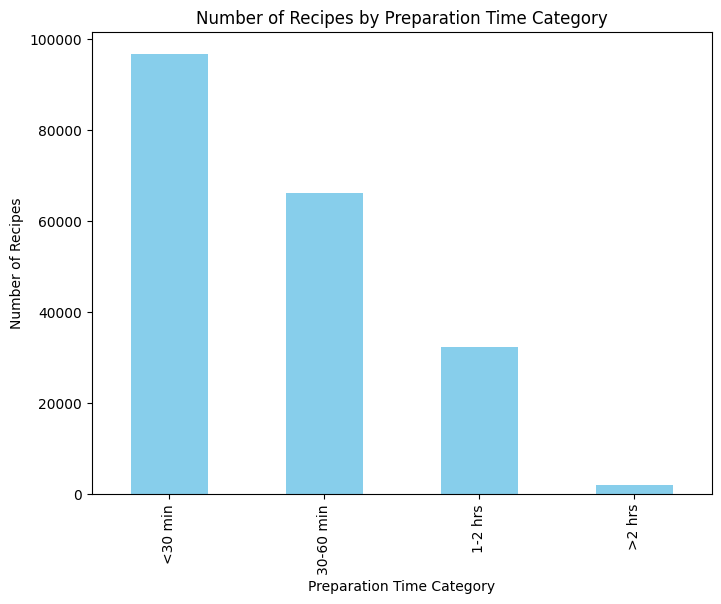

In [77]:
# Bar plot for the number of recipes in each preparation time category
plt.figure(figsize=(8, 6))
final_data['prep_time_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Recipes by Preparation Time Category')
plt.xlabel('Preparation Time Category')
plt.ylabel('Number of Recipes')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8652\3731097648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_data, x='prep_time_category', y='average_rating', palette='Set3')


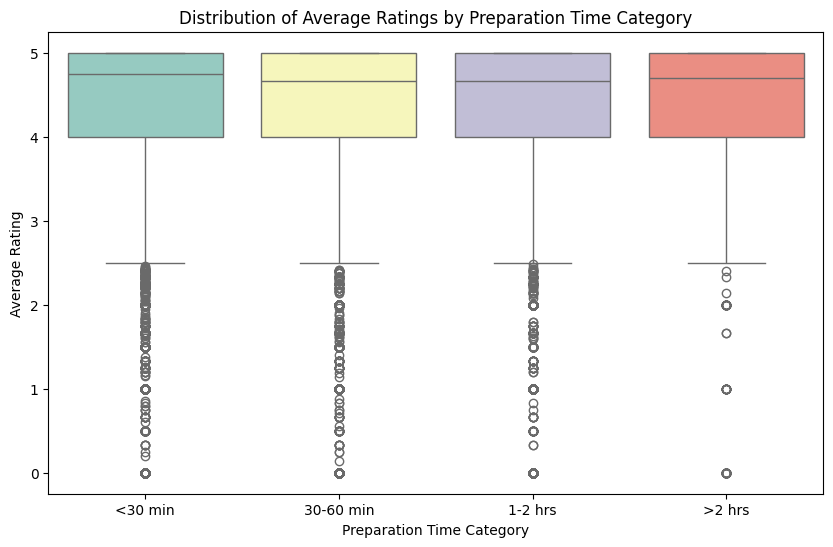

In [78]:
# Box plot for Average Rating per Preparation Time Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='prep_time_category', y='average_rating', palette='Set3')
plt.title('Distribution of Average Ratings by Preparation Time Category')
plt.xlabel('Preparation Time Category')
plt.ylabel('Average Rating')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8652\1823059869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_category = final_data.groupby('prep_time_category')['average_rating'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_8652\1823059869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_per_category, x='prep_time_category', y='average_rating', palette='viridis')


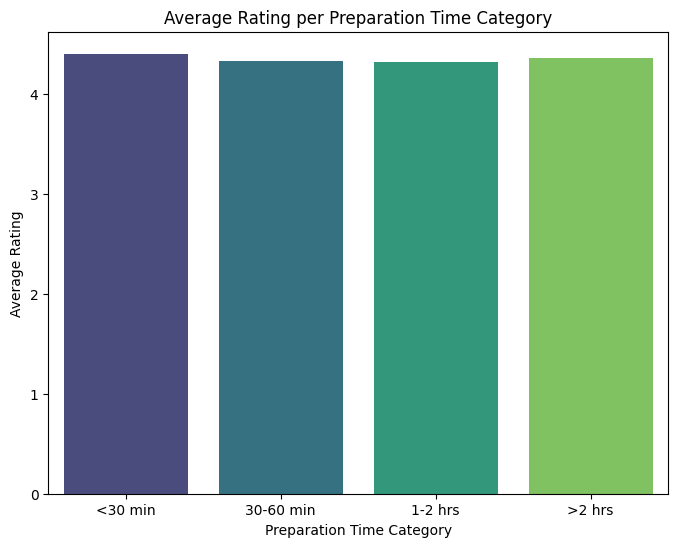

In [79]:
# Calculer la moyenne des notes pour chaque catégorie de temps de préparation
average_rating_per_category = final_data.groupby('prep_time_category')['average_rating'].mean().reset_index()

# Tracer un graphique en barres pour les notes moyennes par catégorie
plt.figure(figsize=(8, 6))
sns.barplot(data=average_rating_per_category, x='prep_time_category', y='average_rating', palette='viridis')
plt.title('Average Rating per Preparation Time Category')
plt.xlabel('Preparation Time Category')
plt.ylabel('Average Rating')
plt.show()


In [80]:
print(final_data.describe())

                  id        minutes  contributor_id        n_steps  \
count  198177.000000  198177.000000    1.981770e+05  198177.000000   
mean   221375.511558      38.571191    4.759679e+06       8.826524   
std    140769.853966      26.478570    9.200073e+07       4.387570   
min        40.000000       0.000000    2.700000e+01       0.000000   
25%     99649.000000      20.000000    5.682400e+04       6.000000   
50%    207086.000000      33.000000    1.747110e+05       8.000000   
75%    332724.000000      55.000000    3.999840e+05      12.000000   
max    537716.000000     132.000000    2.002285e+09      21.000000   

       n_ingredients  average_rating  num_interactions  
count  198177.000000   198177.000000     198177.000000  
mean        8.666081        4.358958          4.856855  
std         3.332518        0.970412         16.990557  
min         1.000000        0.000000          1.000000  
25%         6.000000        4.000000          1.000000  
50%         8.000000       

In [81]:
# Définir un seuil pour les recettes populaires (ici, les recettes avec un nombre d'interactions supérieur au troisième quartile)
threshold = final_data['num_interactions'].quantile(0.75)
popular_recipes = final_data[final_data['num_interactions'] > threshold]
non_popular_recipes = final_data[final_data['num_interactions'] <= threshold]

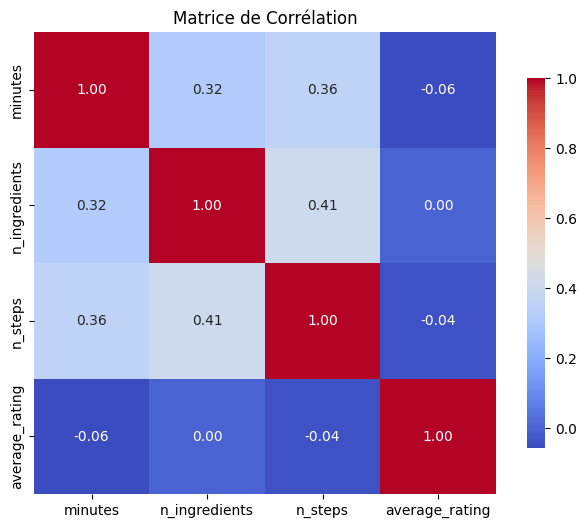

In [82]:
# Calculer la matrice de corrélation
correlation_matrix = popular_recipes[['minutes', 'n_ingredients', 'n_steps', 'average_rating']].corr()

# Tracer le heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation')
plt.show()



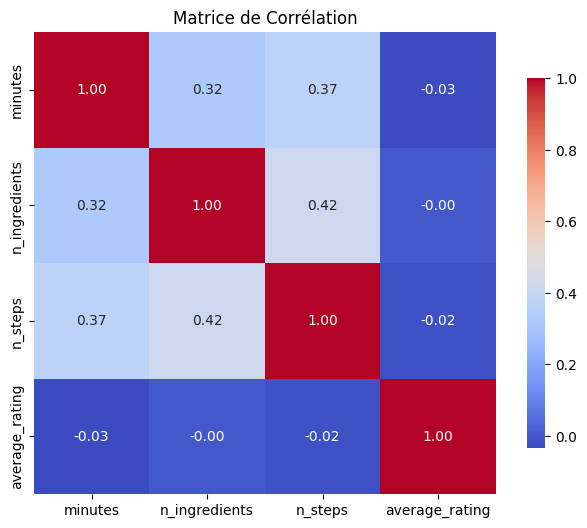

In [83]:
# Calculer la matrice de corrélation
correlation_matrix = final_data[['minutes', 'n_ingredients', 'n_steps', 'average_rating']].corr()

# Tracer le heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation')
plt.show()

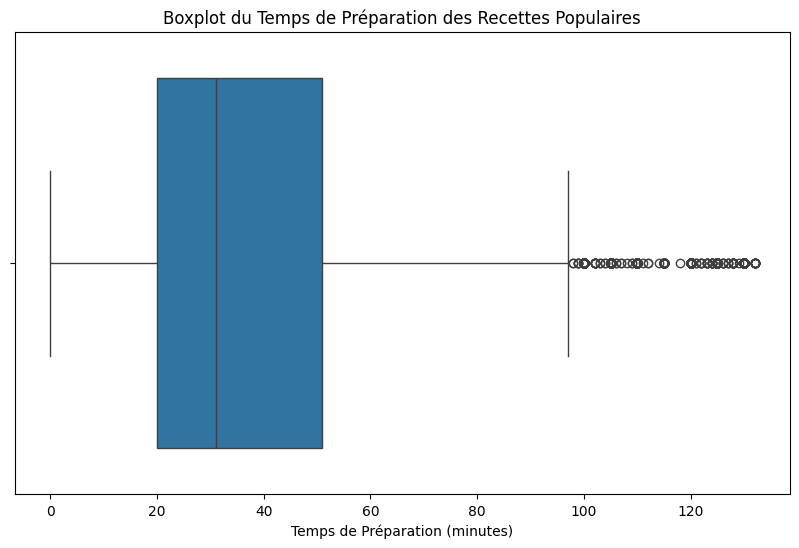

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=popular_recipes['minutes'])
plt.title('Boxplot du Temps de Préparation des Recettes Populaires')
plt.xlabel('Temps de Préparation (minutes)')
plt.show()

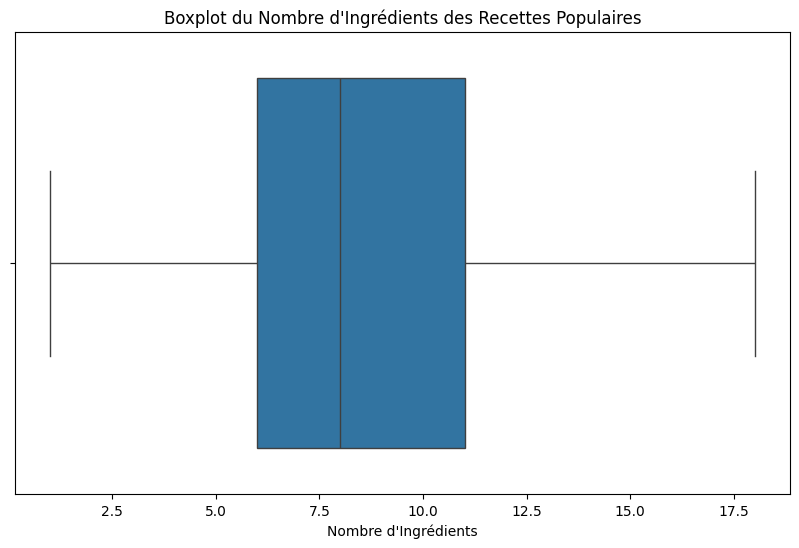

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=popular_recipes['n_ingredients'])
plt.title('Boxplot du Nombre d\'Ingrédients des Recettes Populaires')
plt.xlabel('Nombre d\'Ingrédients')
plt.show()

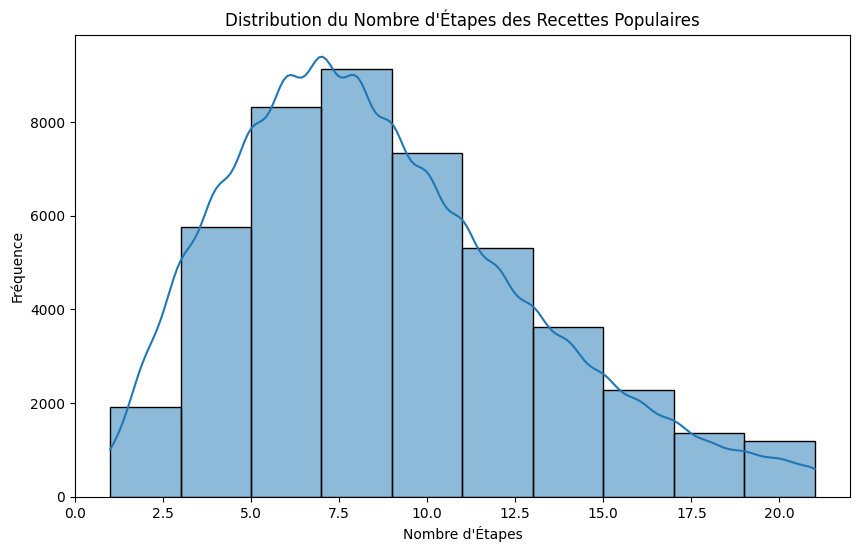

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(popular_recipes['n_steps'], bins=10, kde=True)
plt.title('Distribution du Nombre d\'Étapes des Recettes Populaires')
plt.xlabel('Nombre d\'Étapes')
plt.ylabel('Fréquence')
plt.show()

### TF-IDF ingredient

relation entre ingredient specifique et les minutes

In [87]:
final_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,average_rating,num_interactions,prep_time_category
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,5.0,3,30-60 min
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,3.5,4,<30 min
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,4.0,1,>2 hrs
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,4.5,2,30-60 min
4,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,5.0,2,NaN


In [99]:
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd

# 1. Vérifier que les données sont nettoyées
print(final_data['ingredients'].head())

# 2. Vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(final_data['ingredients'])

# 3. Réduction de dimension avec PCA pour visualisation en 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# 4. Création d'un DataFrame pour les résultats
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Ajout de la colonne 'ingredients_clean' pour afficher les ingrédients au survol
pca_df['ingredients'] = final_data['ingredients']

# 5. Visualisation interactive avec Plotly
fig = px.scatter(pca_df, x='PC1', y='PC2', 
                 hover_data=['ingredients'], 
                 title="Visualisation des Ingrédients par PCA",
                 labels={'PC1': 'Composante Principale 1', 'PC2': 'Composante Principale 2'},
                 opacity=0.7)

# Ajustement des options du graphique
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(autosize=True, width=1000, height=600)

# Afficher la visualisation interactive
fig.show()

# 6. Affichage des mots clés les plus importants (Ingrédients)
feature_names = tfidf_vectorizer.get_feature_names_out()
important_features = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names).sum().sort_values(ascending=False)

# Afficher les ingrédients les plus importants
print("\nIngrédients les plus importants dans le dataset (basé sur TF-IDF):")
print(important_features.head(10))


0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
2    ['ground beef', 'yellow onions', 'diced tomato...
3    ['spreadable cheese with garlic and herbs', 'n...
4    ['milk', 'vanilla ice cream', 'frozen apple ju...
Name: ingredients, dtype: object


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed